In [1]:
# for the Bokeh plots
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 1.0 MB 13.0 MB/s 
     |████████████████████████████████| 16.7 MB 72.0 MB/s 
     |████████████████████████████████| 6.3 MB 55.3 MB/s 


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import json
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
import scipy.special

# Our main plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.plotting
from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column
# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

In [3]:
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

**This is the final dataframe that we have used for EDA.</br> This dataframe has been created from 2 tables: 'business' and 'checkin'. Business had all the data about each business, and checkin had all the checkin details for the businesses.</br>Now, to select the restaurants from all businesses, we checked the categories and if 'restaurant' and 'food' was there in it, we kept it.</br>In the checkin, the dates were in the form of the string, we converted each of entry to datetime, and then got the counts of checkin in different hours, days, weeks, months, years.**

In [4]:
main_df = pd.read_pickle('/content/drive/MyDrive/DS-1/bus_check_loc_final_final_final.pkl')

In [5]:
# columns having numbers
int_cols = []
for i in main_df.columns.values:
  if main_df[i].dtype != 'O':
    int_cols.append(i)
main_df[int_cols].describe()

,latitude,longitude,stars,review_count,is_open,Food,Restaurants,Bars,American (Traditional),Beer Bar,Nightlife,Breweries,Salad,Soup,Sandwiches,Delis,Cafes,Vegetarian,Thai,Breakfast & Brunch,Shopping,Convenience Stores,Pizza,American (New),Bakeries,Desserts,Beer,Wine & Spirits,Event Planning & Services,Seafood,Italian,Cocktail Bars,Gluten-Free,Food Delivery Services,Mediterranean,Greek,Coffee & Tea,Food Trucks,Specialty Food,Mexican,...,2021,January,February,March,April,May,June,July,August,September,October,November,December,hr_0-6,hr_6-12,hr_12-18,hr_18-24,week_1,week_2,week_3,week_4,Mon,Tue,Wed,Thu,Fri,Sat,Sun,hr_0-2,hr_2-4,hr_4-6,hr_6-8,hr_8-10,hr_10-12,hr_12-14,hr_14-16,hr_16-18,hr_18-20,hr_20-22,hr_22-24
count,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.0,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,...,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000,62104.000000
mean,39.277226,-94.968468,3.552621,94.587917,0.662630,0.115323,0.223593,0.019805,0.020562,0.001465,0.022124,0.002560,0.007439,0.002415,0.024974,0.006022,0.008679,0.003575,0.006892,0.014846,0.008196,0.005587,0.027486,0.016778,0.012060,0.009951,0.009919,0.0,0.007391,0.010579,0.014540,0.002866,0.002689,0.001932,0.005120,0.003043,0.031737,0.008405,0.011706,0.018598,...,0.383132,17.344696,16.582974,19.090687,17.971725,18.783331,18.192467,19.687299,19.756344,18.238890,18.268984,16.715139,16.822153,69.438200,5.568546,48.022269,94.425673,49.664080,49.826066,57.837692,60.126852,24.853085,23.383695,24.685318,25.979824,31.138622,44.958425,42.455719,37.485379,22.870604,9.082217,2.752093,0.882842,1.933611,6.093569,13.050641,28.878059,30.044796,27.894161,36.486716
std,7.300047,20.473855,0.793417,192.465543,0.472816,0.319414,0.416655,0.139332,0.141915,0.038251,0.147089,0.050534,0.085930,0.049087,0.156048,0.077369,0.092757,0.059682,0.082730,0.120938,0.090160,0.074540,0.163496,0.128441,0.109157,0.099258,0.099099,0.0,0.085652,0.102310,0.119704,0.053460,0.051787,0.043915,0.071374,0.055082,0.175301,0.091295,0.107561,0.135101,...,1.396049,41.262062,39.245598,46.028011,43.613880,46.476389,44.084819,49.700624,48.776647,44.834558,45.061015,40.405590,40.745669,202.988044,27.745342,144.952069,236.143610,119.205501,118.189667,138.161832,145.428545,64.474242,54.693270,55.960744,59.473604,73.725287,113.851761,113.067285,100.895562,76.024734,43.655588,17.592701,6.653805,12.182758,29.650203,48.155581,84.914074,84.166723,74.733049,93.839302
min,28.062985,-123.349961,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [6]:
# for the number of total checkins per month
k = main_df[['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']].sum(axis=0)
k = pd.DataFrame(k).reset_index()
k.rename(columns = {'index': 'month', 0:'count'}, inplace = True)
k.head()

,month,count
0,January,1077175
1,February,1029869
2,March,1185608
3,April,1116116
4,May,1166520


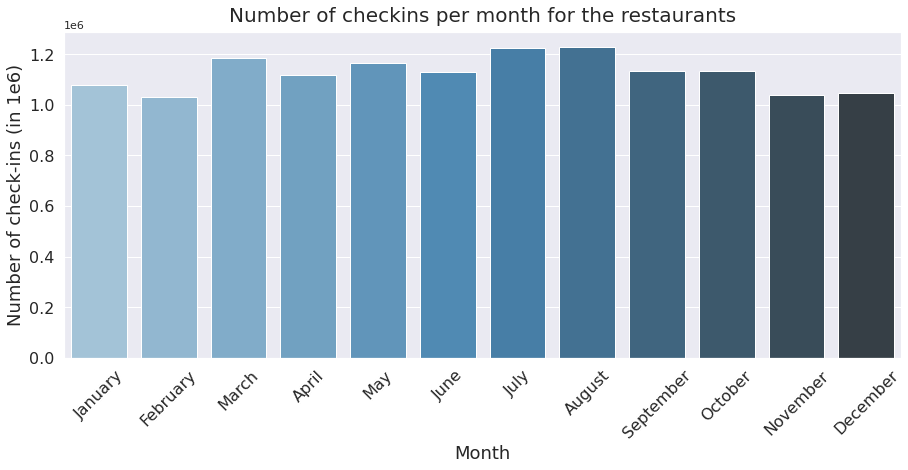

In [7]:
fig = plt.figure(figsize=(15,6))
plt.title('Number of checkins per month for the restaurants', fontsize=20, pad=10)
sns.barplot(x='month', y = 'count', data=k, palette='Blues_d')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of check-ins (in 1e6)', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

**This plot shows the number of checkins each month. The numbers are almost constant.**

In [8]:
# total number of checkins per year
l = main_df[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].sum(axis=0)
l = pd.DataFrame(l).reset_index()
l.rename(columns = {'index': 'year', 0:'count'}, inplace = True)
l.head()

,year,count
0,2010,371578
1,2011,1117750
2,2012,1494274
3,2013,1599085
4,2014,1628890


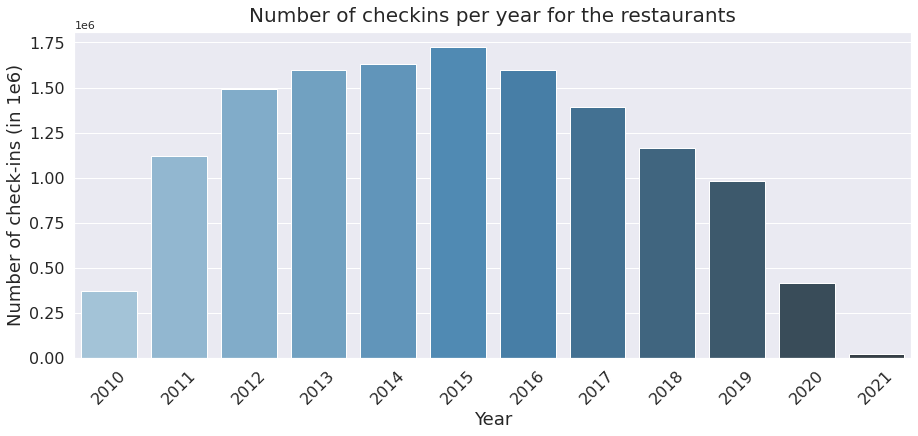

In [9]:
fig = plt.figure(figsize=(15,6))
plt.title('Number of checkins per year for the restaurants', fontsize=20, pad=10)
sns.barplot(x='year', y = 'count', data=l, palette='Blues_d')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of check-ins (in 1e6)', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

**This plot shows the number of checkins each year. This clearly shows the impact of COVID-19 on the restaurants. The number of checkins in 2020 is significantly low as compared to previous years.**

In [10]:
# number of checkins on each weekday
n = main_df[['Sun','Mon', 'Tue', 'Wed','Thu', 'Fri','Sat']].sum(axis=0)
n = pd.DataFrame(n).reset_index()
n.rename(columns = {'index': 'days', 0:'count'}, inplace = True)
n.head()

,days,count
0,Sun,2636670
1,Mon,1543476
2,Tue,1452221
3,Wed,1533057
4,Thu,1613451


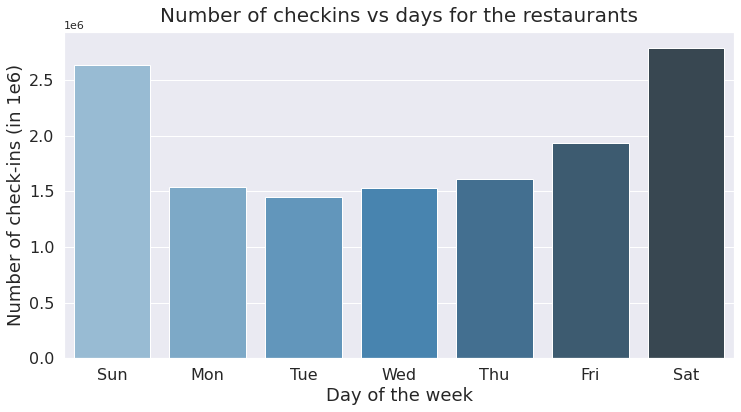

In [11]:
fig = plt.figure(figsize=(12,6))
plt.title('Number of checkins vs days for the restaurants', fontsize=20, pad=10)
sns.barplot(x='days', y = 'count', data=n, palette='Blues_d')
plt.xlabel('Day of the week', fontsize=18)
plt.ylabel('Number of check-ins (in 1e6)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**This graph shows the number of checkins on the weekdays, and it is as expected. The number of checkins is much higher on the weekend s compared to the working days.**

In [12]:
# number of checkins in the weeks of the months
o = main_df[['week_1','week_2', 'week_3', 'week_4']].sum(axis=0)
o= pd.DataFrame(o).reset_index()
o.rename(columns = {'index': 'weeks', 0:'count'}, inplace = True)
o.head()

,weeks,count
0,week_1,3084338
1,week_2,3094398
2,week_3,3591952
3,week_4,3734118


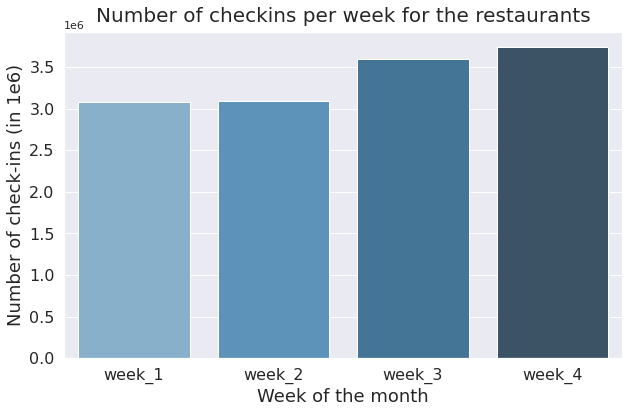

In [13]:
fig = plt.figure(figsize=(10,6))
plt.title('Number of checkins per week for the restaurants', fontsize=20, pad=10)
sns.barplot(x='weeks', y = 'count', data=o, palette='Blues_d')
plt.xlabel('Week of the month', fontsize=18)
plt.ylabel('Number of check-ins (in 1e6)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**In this part, the numbers are higher in the last 2 weeks because we kept 8-9 days to fit the last 2-3 days of the month. That's one of the reasons why the number is larger in the last 2 weeks.**

In [14]:
# number of checkins vs the hours
z = main_df[['hr_0-2','hr_2-4','hr_4-6','hr_6-8','hr_8-10','hr_10-12','hr_12-14','hr_14-16','hr_16-18','hr_18-20','hr_20-22','hr_22-24']].sum(axis=0)
z = pd.DataFrame(z).reset_index()
z.rename(columns = {'index': 'hours', 0:'count'}, inplace = True)
z.head()

,hours,count
0,hr_0-2,2327992
1,hr_2-4,1420356
2,hr_4-6,564042
3,hr_6-8,170916
4,hr_8-10,54828


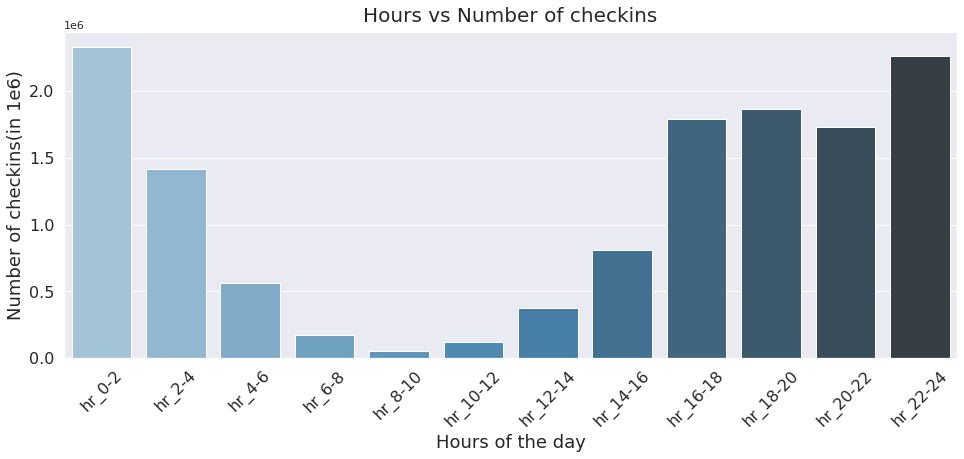

In [15]:
fig = plt.figure(figsize=(16,6))
plt.title('Hours vs Number of checkins', fontsize=20, pad=10)
sns.barplot(x='hours', y = 'count', data=z, palette='Blues_d')
plt.xlabel('Hours of the day', fontsize=18)
plt.ylabel('Number of checkins(in 1e6)', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

**This plot shows number of checkins vs the hours. It makes sense because very few people would be going to the restaurants from 10 am to 4-5 pm as these are the normal working hours. And almost no people would be going very early in the morning. The busy hours would be starting around 6 in the evening, as the plot suggests. The late night entries could be into the clubs.**

In [16]:
# getting the number of ratings given vs the rating
stars_counts = {}
for i in range(1,6):
  stars_counts['{}'.format(i)] = main_df[main_df['stars'] <= i].shape[0]
stars_counts

{'1': 200, '2': 4436, '3': 19650, '4': 50327, '5': 62104}

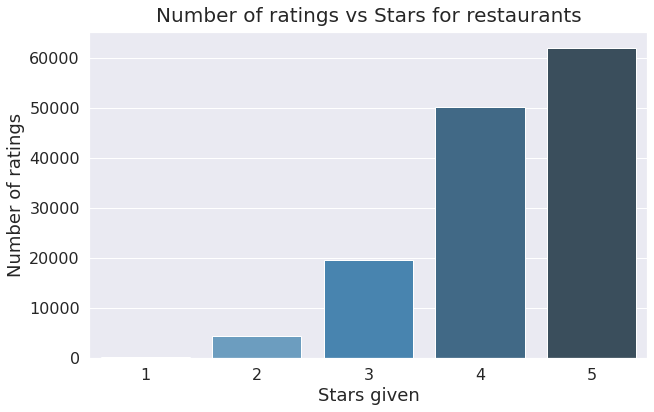

In [17]:
fig = plt.figure(figsize=(10,6))
plt.title('Number of ratings vs Stars for restaurants', fontsize=20, pad=10)
sns.barplot(x=list(stars_counts.keys()), y = list(stars_counts.values()), data=o, palette='Blues_d')
plt.xlabel('Stars given', fontsize=18)
plt.ylabel('Number of ratings', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**This plot shows that we tend to give good ratings generally. And we aren't very negative except very few occasions. So, people tend to 4-5 ratings most of the times.**

In [18]:
# for the restaurant count, review count and mean stars for the states
state_df = main_df.groupby(['state']).agg({'business_id': 'count', 'stars': 'mean','review_count': 'sum'}).rename(columns={'business_id': 'business_count', 'stars': 'stars_mean'})
state_df = pd.DataFrame(state_df).reset_index()
state_df.head()

,state,business_count,stars_mean,review_count
0,ABE,1,4.500000,14
1,BC,9419,3.491029,466365
2,CO,1079,3.611677,97507
3,DE,1,4.500000,7
4,FL,9443,3.546542,797372


In [19]:
state_df = state_df.sort_values(by='business_count', ascending=False)

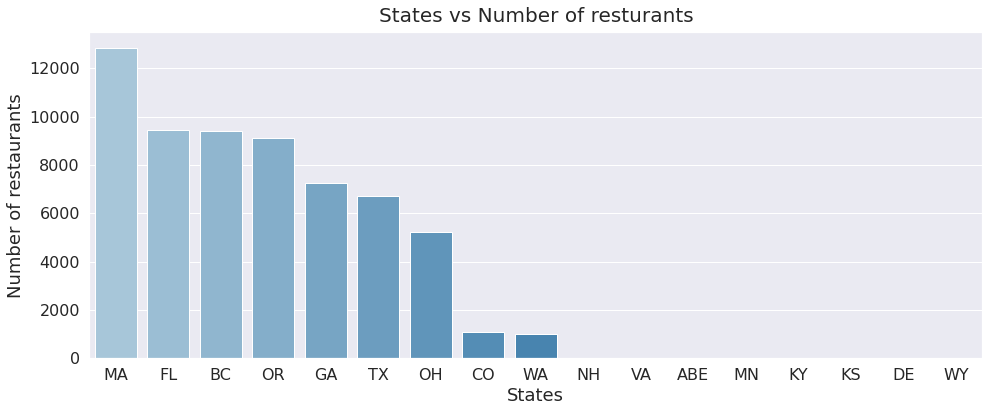

In [20]:
fig = plt.figure(figsize=(16,6))
plt.title('States vs Number of resturants', fontsize=20, pad=10)
sns.barplot(x='state', y = 'business_count', data=state_df, palette='Blues_d')
plt.xlabel('States', fontsize=18)
plt.ylabel('Number of restaurants', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

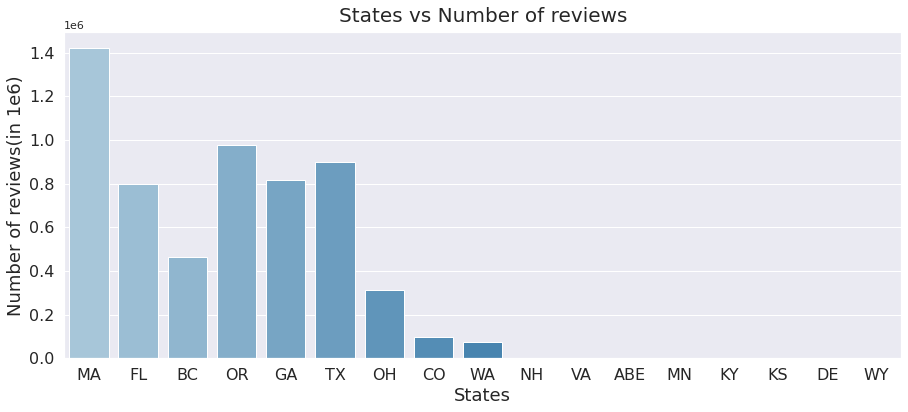

In [21]:
fig = plt.figure(figsize=(15,6))
plt.title('States vs Number of reviews', fontsize=20, pad=10)
sns.barplot(x='state',y='review_count', data=state_df, palette='Blues_d')
plt.xlabel('States', fontsize=18)
plt.ylabel('Number of reviews(in 1e6)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**Seeing the cleaned reviews table: It'll help us to see the reviews per hours, months and years**

In [22]:
df_see_reviews = pd.read_pickle('/content/drive/MyDrive/DS-1/reviews.pkl')

In [23]:
df_see_reviews.head()

,review_id,user_id,business_id,stars,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,2011-07-28 18:05:01


In [24]:
dates_see = df_see_reviews[['stars', 'date']]

In [25]:
# del df_see_reviews

In [26]:
# converting to datetime format
dates_see['date'] = pd.to_datetime(dates_see['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# creating a column for hour of review
dates_see['hour'] = dates_see.date.apply(lambda x: x.hour)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
# creating a column for year of review
dates_see['year'] = dates_see.date.apply(lambda x: x.year)
# creating a column for month of review
dates_see['month'] = dates_see.date.apply(lambda x: x.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
dates_see.head()

,stars,date,hour,year,month
0,4.0,2014-10-11 03:34:02,3,2014,10
1,4.0,2015-07-03 20:38:25,20,2015,7
2,5.0,2013-05-28 20:38:06,20,2013,5
3,2.0,2010-01-08 02:29:15,2,2010,1
4,4.0,2011-07-28 18:05:01,18,2011,7


In [30]:
stars_df = dates_see.groupby(['hour']).agg({'date': 'count', 'stars': 'mean'}).rename(columns={'date': 'count', 'stars': 'stars_mean'})
stars_df = stars_df.reset_index()
stars_df.head()

,hour,count,stars_mean
0,0,541343,3.729990
1,1,540806,3.721346
2,2,510389,3.721285
3,3,434698,3.722249
4,4,338665,3.716011


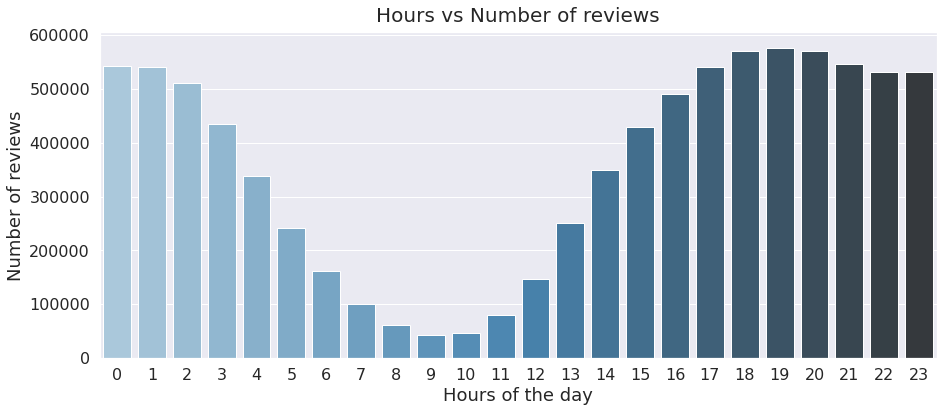

In [31]:
fig = plt.figure(figsize=(15,6))
plt.title('Hours vs Number of reviews', fontsize=20, pad=10)
sns.barplot(x='hour',y=('count'), data=stars_df, palette='Blues_d')
plt.xlabel('Hours of the day', fontsize=18)
plt.ylabel('Number of reviews', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('/content/drive/MyDrive/DS-1/hrs_vs_rev.jpeg',dpi=200)
plt.show()

**This plot shows number of reviews vs the hours. It makes sense because the people tend to review the restaurants after they come out of it. And the graphs reveal the same.**

In [32]:
stars_df2 = dates_see.groupby(['year']).agg({'date': 'count', 'stars': 'mean'}).rename(columns={'date': 'count', 'stars': 'stars_mean'})
stars_df2 = stars_df2.reset_index()
stars_df2.head()

,year,count,stars_mean
0,2004,52,3.942308
1,2005,6439,3.876223
2,2006,23819,3.833242
3,2007,71916,3.767117
4,2008,150436,3.726156


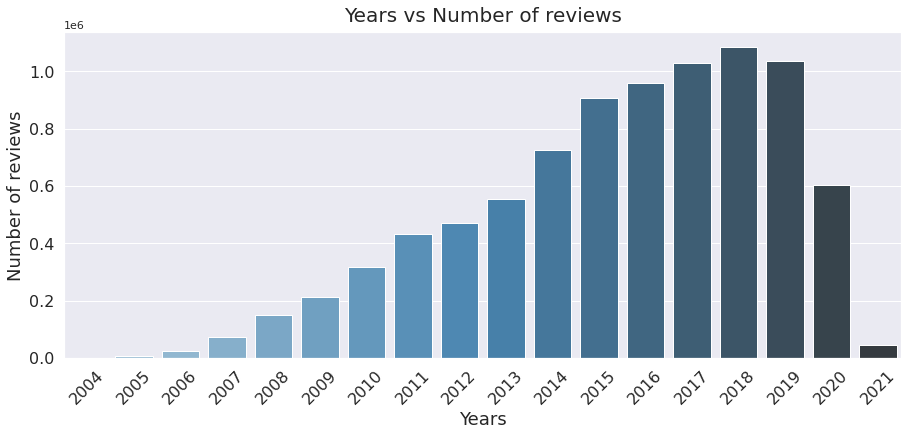

In [33]:
fig = plt.figure(figsize=(15,6))
plt.title('Years vs Number of reviews', fontsize=20, pad=10)
sns.barplot(x='year',y='count', data=stars_df2, palette='Blues_d')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of reviews', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

**Here, we can see the impact of COVID. The number of reviews are significantly low in 2020. This is very similar to the impact we had seen for the number of checkins. So, it makes perfect sense.**

In [34]:
stars_df3 = dates_see.groupby(['month']).agg({'date': 'count', 'stars': 'mean'}).rename(columns={'date': 'count', 'stars': 'stars_mean'})
stars_df3 = stars_df3.reset_index()
stars_df3.head()

,month,count,stars_mean
0,1,759179,3.751972
1,2,670307,3.739445
2,3,726061,3.739215
3,4,672600,3.737404
4,5,710459,3.719211


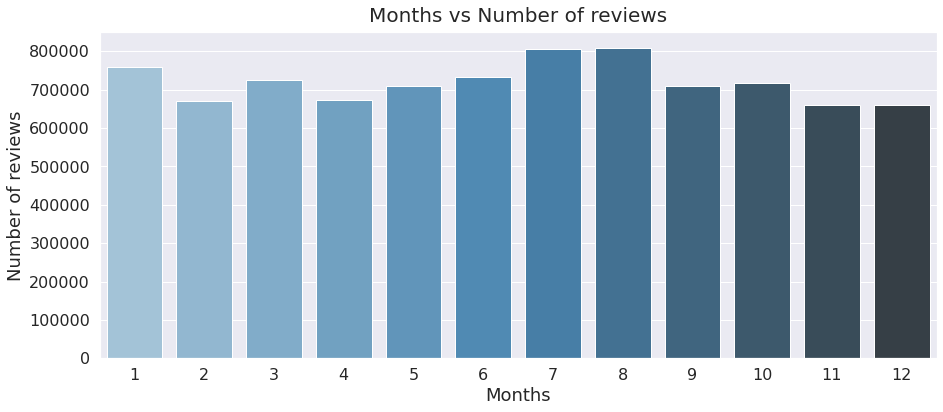

In [35]:
fig = plt.figure(figsize=(15,6))
plt.title('Months vs Number of reviews', fontsize=20, pad=10)
sns.barplot(x='month',y='count', data=stars_df3, palette='Blues_d')
plt.xlabel('Months', fontsize=18)
plt.ylabel('Number of reviews', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**Here,This plot is so much similar to the number of checkins per month. And the ratio of checkins to reviews would be almost constant.**

**Bokeh Plot showing number of restaurants, avg ratings, total number of reviews for the restaurants in each state.**</br>
*Reference: Lab-5 (Univ.AI - DS-1)*

In [36]:
usa = gpd.read_file('/content/drive/MyDrive/DS-1/cb_2020_us_cbsa_20m/cb_2020_us_cbsa_20m.shp')

In [37]:
usa['state'] = usa['NAME'].apply(lambda x: x.split(',')[-1].strip())
usa.head()

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,state
0,198,47920,310M600US47920,47920,"Washington Court House, OH","Washington Court House, OH Micro Area",M2,1052469885,1694038,"POLYGON ((-83.65333 39.71688, -83.25244 39.695...",OH
1,None,21380,310M600US21380,21380,"Emporia, KS","Emporia, KS Micro Area",M2,4197156992,32652918,"POLYGON ((-96.83765 38.34864, -96.81951 38.522...",KS
2,None,31740,310M600US31740,31740,"Manhattan, KS","Manhattan, KS Metro Area",M1,4752896547,137754617,"POLYGON ((-96.96318 39.13230, -96.96122 39.151...",KS
3,412,11580,310M600US11580,11580,"Arcadia, FL","Arcadia, FL Micro Area",M2,1649031791,6243548,"POLYGON ((-82.05650 27.20777, -82.05575 27.338...",FL
4,454,39820,310M600US39820,39820,"Redding, CA","Redding, CA Metro Area",M1,9778551576,186157964,"POLYGON ((-123.06879 40.33223, -122.99868 40.4...",CA


In [38]:
def merge_dataset():
  merged = usa[['state', 'geometry']].merge(state_df, on = 'state', how = 'left')
  return merged

In [39]:
merged = merge_dataset()

In [40]:
# Read data to json
merged_json = json.loads(merged.to_json())
# Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)

In [41]:
merged.describe()

,business_count,stars_mean,review_count
count,314.000000,314.000000,3.140000e+02
mean,4627.194268,3.289249,4.877601e+05
std,3613.083114,0.651206,4.117120e+05
min,1.000000,1.500000,6.000000e+00
25%,2.000000,3.430061,2.800000e+01
50%,5227.000000,3.505440,3.144760e+05
75%,7242.000000,3.692743,9.017760e+05
max,12855.000000,4.500000,1.423363e+06


In [42]:
# Define color pallate 
#In the context of Bokeh, a palette is a simple plain Python list of (hex) RGB color strings.
palette = brewer['Blues'][5]
# Reverse color order so that dark blue is highest number of restaurants.
palette = palette[::-1]

In [85]:
color_mapper = LinearColorMapper(palette = palette, low=merged['business_count'].min(), high = merged['business_count'].max(), nan_color = '#f03b20')
# Define custom tick labels for colorbar.
tick_labels = {'2000': '>2000'}

In [86]:
# Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=25,width = 400, height = 50, border_line_color=None, location = 'bottom_center', orientation = 'horizontal', major_label_overrides = tick_labels)

In [87]:
# Define hover tooltips
hover = HoverTool(tooltips = [('state','@state'),('restaurants','@business_count'),('rating','@stars_mean'),('review_count','@review_count')])

In [88]:
# Create figure object 
p = figure(title = 'Number of Restaurants, reviews, avg_ratings for states' ,
          plot_height = 700,
          plot_width = 900 ,
          toolbar_location = None,
           tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


In [89]:
# Add patch renderer to figure.
p.patches('xs','ys', source = geosource ,fill_color = {'field' :'business_count', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)

GlyphRenderer(id='1535', ...)

In [90]:
#Specify layout
p.add_layout(color_bar, 'below')

In [91]:
# Render the plot
bokeh.io.show(p)

In [92]:
bokeh.plotting.output_file("/content/drive/MyDrive/DS-1/usa_state_business1.html")
bokeh.io.save(p, title="Bokeh plot")

'/content/drive/MyDrive/DS-1/usa_state_business1.html'

In [97]:
colors=np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


**Classification**

In [98]:
neigh = KNeighborsClassifier(n_neighbors=300)

In [99]:
main_int_df = main_df[int_cols]

In [100]:
neigh.fit(main_int_df,main_df['state'])

KNeighborsClassifier(n_neighbors=300)

In [101]:
y_pred = neigh.predict(main_int_df)

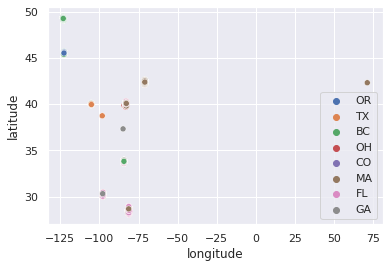

In [102]:
sns.scatterplot(x = main_df['longitude'],y = main_df['latitude'], hue=y_pred)

In [103]:
scaler = StandardScaler()
main_df_std = scaler.fit_transform(main_df[int_cols])

In [104]:
pca = PCA(n_components=20)
pca_transformed = pca.fit_transform(main_df_std)

In [105]:
# Save the transformed dataset to a DataFrame
col_list = ['PC{}'.format(x) for x in range(1,pca_transformed.shape[1] + 1)]
pca_transformed = pd.DataFrame(pca_transformed, columns= col_list)
print('The shape of nhanes_transformed is {}'.format(pca_transformed.shape))
pca_transformed.head()

The shape of nhanes_transformed is (62104, 20)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.033108,-3.099167,0.108150,-1.145801,0.910764,0.176345,1.756236,-0.911448,0.050066,-1.142743,-0.910967,-0.546360,-0.082244,0.166376,-0.490141,-0.025913,-0.472053,0.301759,-0.038381,0.170768
1,11.554977,1.729023,-4.165965,0.180427,0.327817,-1.418719,1.589629,1.540539,-0.192967,-0.577044,0.311087,-0.121460,0.955489,-0.669937,-0.517984,-0.636399,-0.822402,0.482348,0.064161,-1.869198
2,0.870511,-0.476596,1.740452,0.203258,-1.566222,-1.503693,1.701401,1.444346,-1.013769,0.245938,0.171083,-0.621815,1.155676,-0.605024,0.059222,-0.313082,-0.239498,0.019251,-0.327813,-0.075985
3,-2.780361,2.450990,-0.165991,-1.820384,0.298141,-0.369254,-0.059314,1.080150,0.565641,0.507876,-0.394644,-0.864789,-0.618450,0.252426,-0.810755,0.818742,-0.740805,0.328734,-0.178524,-0.798950
4,-2.518828,1.143472,-0.080432,-2.143992,1.070048,0.161934,1.706728,-2.446577,-0.550122,-0.302381,0.136610,0.347627,-0.280578,0.243697,0.645140,-0.863920,0.238186,-0.065777,-0.283914,0.498759


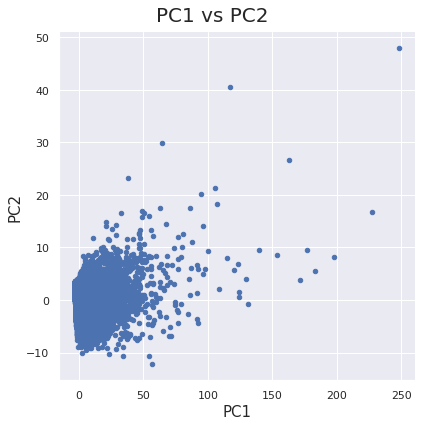

In [106]:
# your code here
g = sns.FacetGrid(data=pca_transformed, height=6, aspect=1)
g.map(plt.scatter, 'PC1', 'PC2', s=20)
g.set_axis_labels("PC1", "PC2", fontsize=15)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('PC1 vs PC2', fontsize=20)
plt.show()

In [107]:
neigh.fit(pca_transformed,main_df['state'])

KNeighborsClassifier(n_neighbors=300)

In [108]:
y_pred = neigh.predict(pca_transformed)

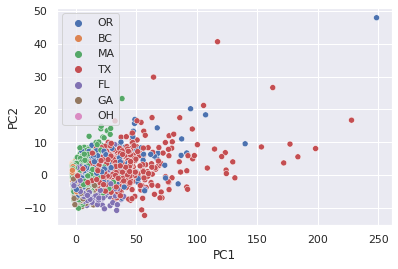

In [109]:
sns.scatterplot(x = pca_transformed['PC1'],y = pca_transformed['PC2'], hue=y_pred)

**Clearly, the variance is not preserved in the transformed principal components. This is because of sparcity of data. About 95% of the data is zeroes, so PCA isn't working very well here.**